In [1]:
from moa.frontend import LazyArray

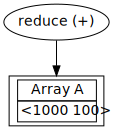

In [2]:
_A = LazyArray(shape=(1000, 100), name='A')
_B = LazyArray(shape=(1000, 100), name='B')

expression = _A.reduce('+')
expression

In [3]:
print(expression.compile(use_numba=True))



@numba.jit
def f(A):
    
    
    if (not (len(A.shape) == 2)):
        
        raise Exception('arguments have invalid dimension')
    
    if (not ((100 == A.shape[1]) and (1000 == A.shape[0]))):
        
        raise Exception('arguments do not match declared shape')
    
    _a10 = numpy.zeros((100,))
    
    for _i1 in range(0, 100, 1):
        
        _a12 = numpy.zeros(())
        
        for _i3 in range(0, 1000, 1):
            _a12 = (_a12 + 
            A[(_i3, _i1)])
        
        _a10[(_i1,)] = _a12
    return _a10


In [4]:
import numba
import numpy

A = numpy.random.random((1000, 100))
B = numpy.random.random((1000, 100))

exec(expression.compile(use_numba=True))

In [5]:
%%timeit

# yeah its slow... really slow
f(A=A)

29 ms ± 1.05 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
%%timeit

A.sum(axis=1)

73.8 µs ± 1.17 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
